In [1]:
#Begin, as always, just by looking at the graphs
from ROOT import TFile, TCanvas, TH1D, TH2D, TF1, gPad , gStyle, TGraph, TGraphErrors, gROOT, TColor
from ROOT import kViridis, kBird, kCubehelix, kRainBow, kColorPrintableOnGrey, kBlackBody, kCMYK, kGreenPink, kLightTemperature
#color schemes options: https://root.cern.ch/doc/master/classTColor.html
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress 

KeyboardInterrupt: 

 FCN=9080.38 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=3.6133e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.44678e+03   2.86925e+01   8.82836e-01   4.34214e-06
   2  Mean         7.93734e+02   4.20993e-01   1.95686e-02   4.95614e-05
   3  Sigma        1.20729e+02   4.76904e-01   3.31702e-05   8.97712e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Calo Plots


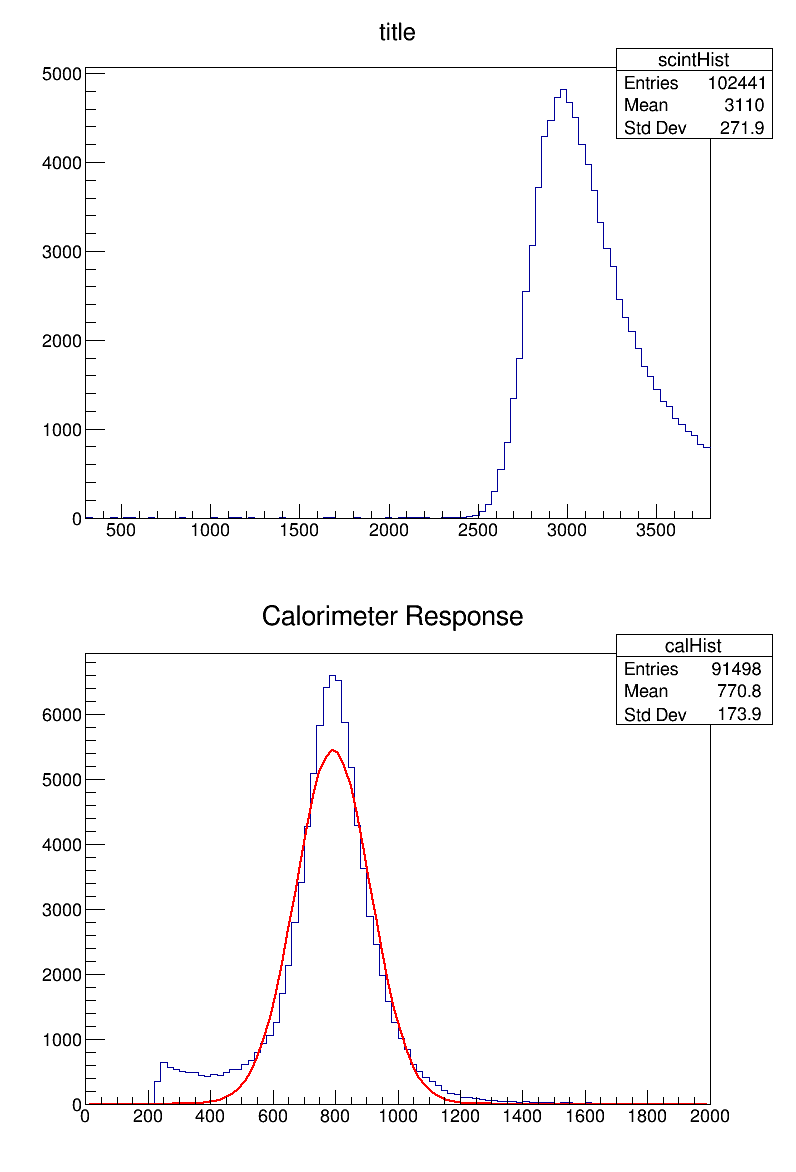

In [6]:
c1=TCanvas("Calo Plots", "CaloPlots", 800, 1200)
c1.Divide(1, 2)
c1.cd(1)
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")
scintHist=TH1D("scintHist", "title", 100, 300, 3800)
calHist=TH1D("calHist", "Calorimeter Response", 100, 0, 2000)
RAWdata.Draw("QDC0_ch0>>scintHist")
scintHist.Draw()
c1.cd(2)
RAWdata.Draw("QDC0_ch2>>calHist", "QDC0_ch2>230")
calHist.Draw()
calHist.Fit("gaus")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Calo Plots


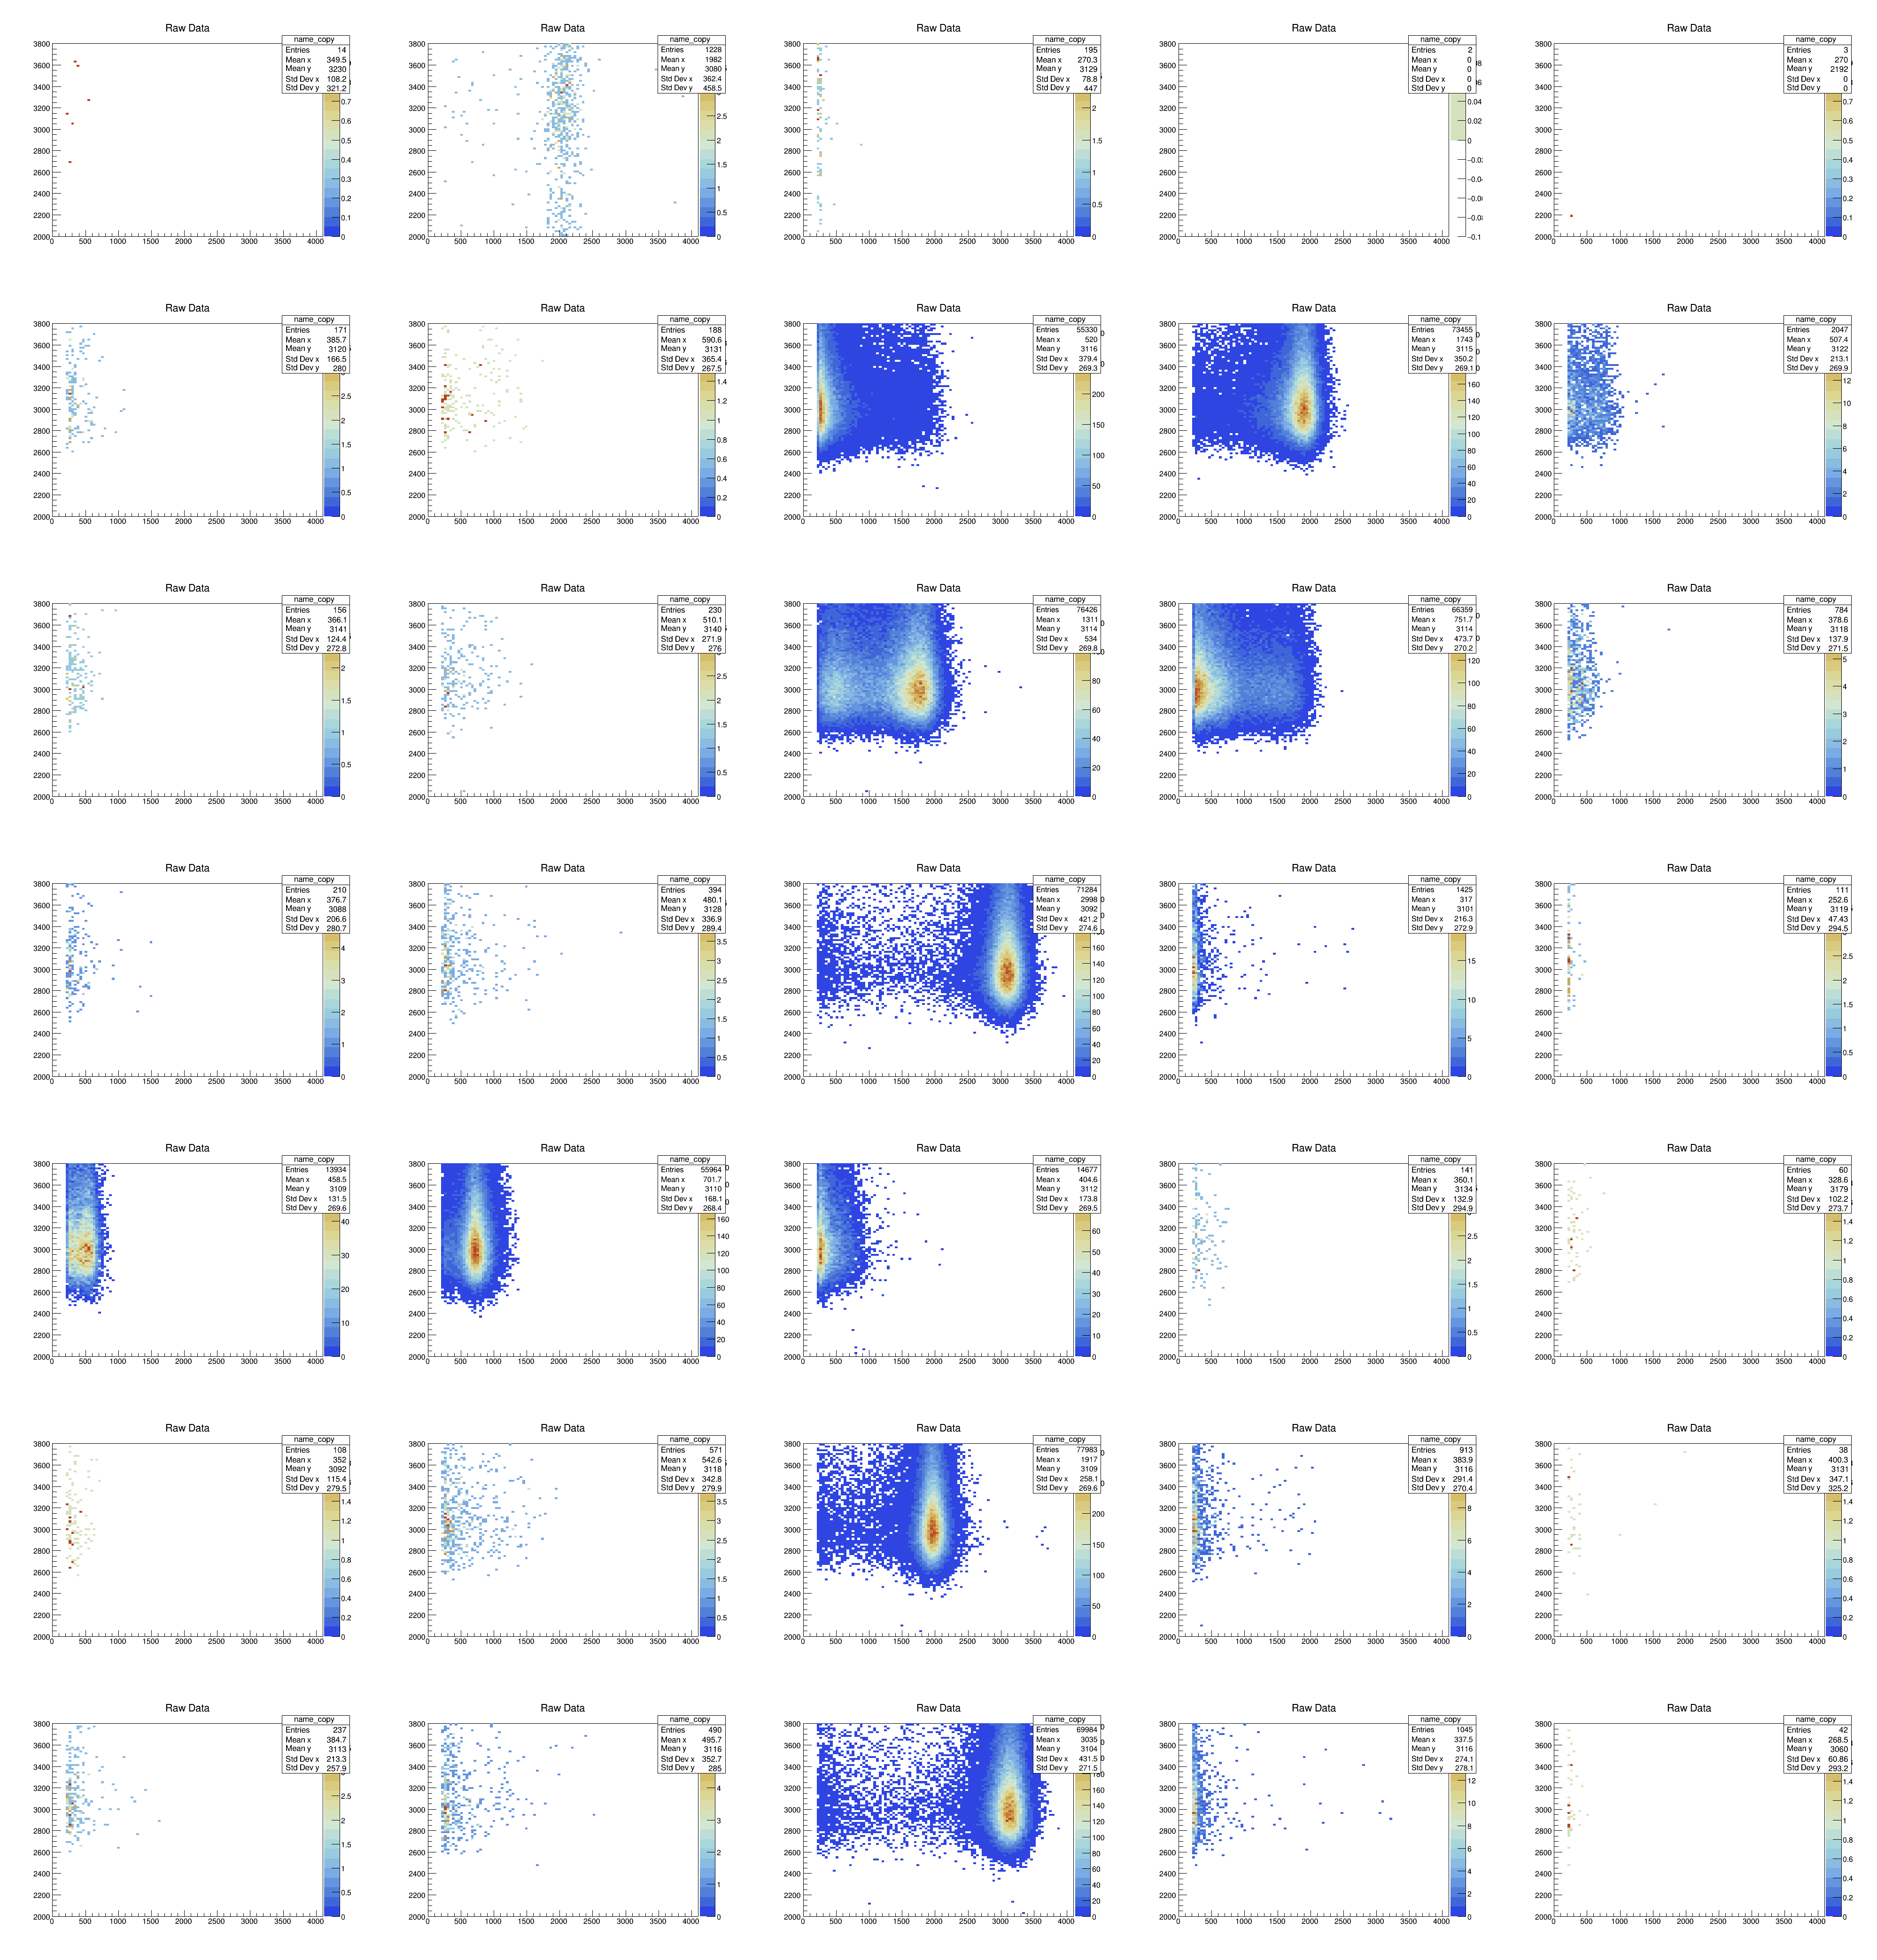

In [7]:
runNumbersE=["1571906107", 
             "1571933143", 
             "1571932668", 
             "1571934315",  
             "1571937854", 
             "1571939524", 
             "1571950975"]
#c1=TCanvas("Calo Plots", "CaloPlots", 4000, 600*math.ceiling(len(runNumbersE)/5))
c1=TCanvas("Calo Plots", "CaloPlots", 4000, len(runNumbersE)*600)
c1.Divide(5, len(runNumbersE))

direct=1
for run in runNumbersE:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH2D("name", "Raw Data", 100, 0, 4100, 100, 2000, 3800)
    for i in [5, 1, 2, 3, 4]:
        c1.cd(direct)
        RAWdata.Draw("QDC0_ch0:QDC0_ch"+str(i)+">>name", "QDC0_ch0>300 && QDC0_ch0<3800 && QDC0_ch" + str(i) + ">230")
        #gPad.SetLogz()
        #gStyle.SetPalette(kColorPrintableOnGrey)
        gStyle.SetPalette(kLightTemperature)
        #TColor.InvertPalette()
        hist1.DrawCopy("colz")
        direct+=1
    
c1.Draw()

In [8]:
#We want to think of the 5 calorimeters as one big one
#That means that for any event we add up the QDC data from all the calorimeters (above the pedestal)
#But each calorimters has a different PMT, so we can't add them straight up
#Rather, we do QCC1*K1+QDC2*K2+ ...

cutoff=230 #This is the pedestal for the QDC

#First, we want to make a linear regression of Calo 1
caloNum=1

calo1=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906107.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit("fitti") #Apply the gaussian fit
calo1+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906358.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo1+=[(5, fitti.GetParameter("Mean"))]

#Now a linear regression for Calo 2. We will follow the exact same format (copy paste), so all hard coded
caloNum=2

calo2=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906955.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo2+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906677.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo2+=[(5, fitti.GetParameter("Mean"))]

#Now data for Calo 3
caloNum=3

calo3=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907163.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo3+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907343.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo3+=[(5, fitti.GetParameter("Mean"))]

#And data for Calo 4
caloNum=4

calo4=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907892.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo4+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907628.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo4+=[(5, fitti.GetParameter("Mean"))]

#Then finally 5
caloNum=5

calo5=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571905775.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo5+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571905465.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo5+=[(5, fitti.GetParameter("Mean"))]

 FCN=4174.92 FROM MIGRAD    STATUS=CONVERGED     149 CALLS         150 TOTAL
                     EDM=1.87656e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.61457e+03   3.46254e+01   8.03584e-01  -3.47866e-07
   2  Mean         2.02484e+03   6.43796e-01   2.02650e-02  -2.99795e-04
   3  Sigma        1.41581e+02   5.91316e-01   2.01733e-05  -2.35621e-03
 FCN=3752.73 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     EDM=1.38438e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.11801e+03   2.34641e+01  -2.34601e-02   3.35744e-06
   2  Mean         3.28363e+03   9.62981e-01  -5.93949e-04  -4.31778e-06
   3  Sigma        1

Warning in <Fit>: Abnormal termination of minimization.


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


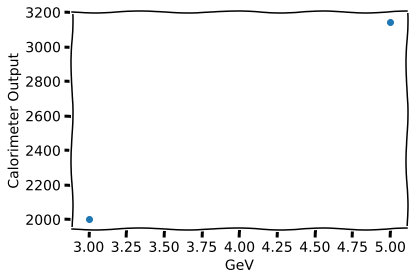

In [9]:
#Plot the 1 GeV one as an example
with plt.xkcd(): #Set the style of the plot
    plt.scatter([i[0] for i in calo2], [i[1] for i in calo2]) #[0] is the GeV and [1] is the mean hits
    plt.xlabel('GeV')
    plt.ylabel('Calorimeter Output')

for event in RAWData:
    getScint()
    getCalo()
    plot(x=calo, y=scint)

In [10]:
caloBration={} #We will have a dictionary referenced by calo number (QDC channel) with a tuple (slope, intercept)
                #Using the scipy library linear regression formula
calo1data=linregress([i[1] for i in calo1], [i[0] for i in calo1])
caloBration[1]=(calo1data[0], calo1data[1])

calo2data=linregress([i[1] for i in calo2], [i[0] for i in calo2])
caloBration[2]=(calo2data[0], calo2data[1])

calo3data=linregress([i[1] for i in calo3], [i[0] for i in calo3])
caloBration[3]=(calo3data[0], calo3data[1])

calo4data=linregress([i[1] for i in calo4], [i[0] for i in calo4])
caloBration[4]=(calo4data[0], calo4data[1])

calo5data=linregress([i[1] for i in calo5], [i[0] for i in calo5])
caloBration[5]=(calo5data[0], calo5data[1])

print(caloBration)

{1: (0.0015888322379961966, -0.21713148283758077), 2: (0.001747177805077286, -0.49342262797767145), 3: (0.0016767537686441267, -0.43412233759399754), 4: (0.0016202332081508614, -0.33147998791469835), 5: (0.0016052238944486911, -0.03340428846205512)}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: 2zplots


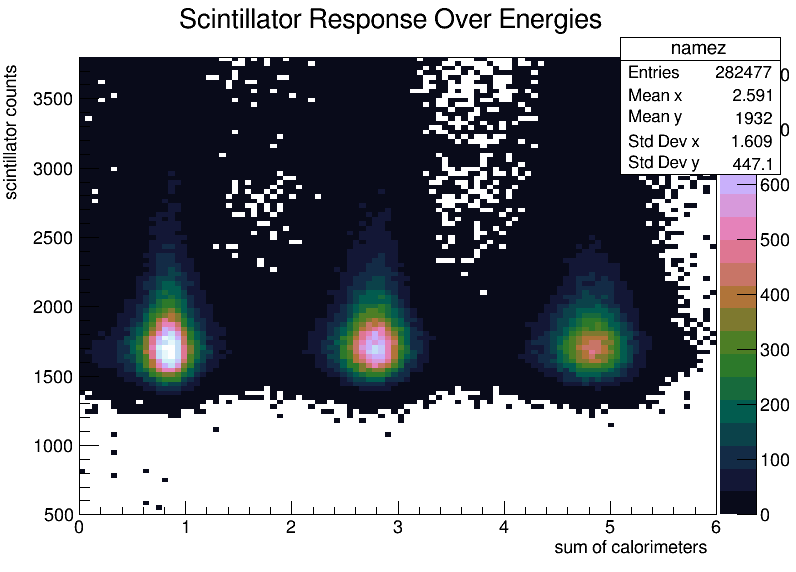

In [11]:
#This gives us something like the plots above, but for three runs
runNumbers1=[1571931443,  #1 GeV
           1571932668, #3 GeV
           1571935652] #5 GeV - 1 cm scintillator
runNumbers=[1572006850,  #1 GeV
           1572004934, #3 GeV
           1572004238] #5 GeV  - 0.5 cm scintillator
cz=TCanvas("2zplots", "2zplots", 800, 600)
pedestal=230

'''dataFiles=[] #Not totally sure whz this refuses to work
for runNum in runNumbers:
    importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNum) + ".root", "READ")
    rootData=importFile.Get("RAWdata")
    dataFiles.append(rootData)'''
    
runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumbers[0]) + ".root" #1 GeV
importFile = TFile(runName, "READ")
RAWdata1=importFile.Get("RAWdata")

runName2="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumbers[1]) + ".root" #3 GeV
importFile2 = TFile(runName2, "READ")
RAWdata2=importFile2.Get("RAWdata")

runName3="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumbers[2]) + ".root" #5 GeV
importFile3 = TFile(runName3, "READ")
RAWdata3=importFile3.Get("RAWdata")

dataFiles=[RAWdata1, RAWdata2, RAWdata3] 


hist1z=TH2D("namez", "Scintillator Response Over Energies; sum of calorimeters;scintillator counts", 100, 0, 6, 100, 500, 3800)
histq=TH1D("energz", "Energies", 50, 2000, 4000)

for RAWdata in dataFiles:
    for event in RAWdata:
        caloDatA=[q if q>pedestal else 0 for q in [getattr(event, "QDC0_ch"+str(i)) for i in range(1, 6)]] #take the calorimeter values and store them to a list if they are above the pedestal
        #print(caloDatA)
        for i in range(1, 6):
            if caloDatA[i-1]!=0:
                caloDatA[i-1]=caloDatA[i-1]*caloBration[i][0]+caloBration[i][1] #turn them into GeV
        partEnergy=sum(caloDatA)
        #print(caloDatA)
        scintData=event.QDC0_ch0
        if scintData>300 and scintData<3800 and partEnergy>0: #above pedestal and below saturation
            hist1z.Fill(partEnergy, scintData)
            #print((partEnergy, scintData))      
        

#RAWdata.Draw("QDC0_ch0:QDC0_ch3>>namez", "QDC0_ch0>300 && QDC0_ch0<3800 && QDC0_ch3>230")
gStyle.SetPalette(kCubehelix)
hist1z.Draw("colz")
#histq.Draw()
    
cz.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 2zplots


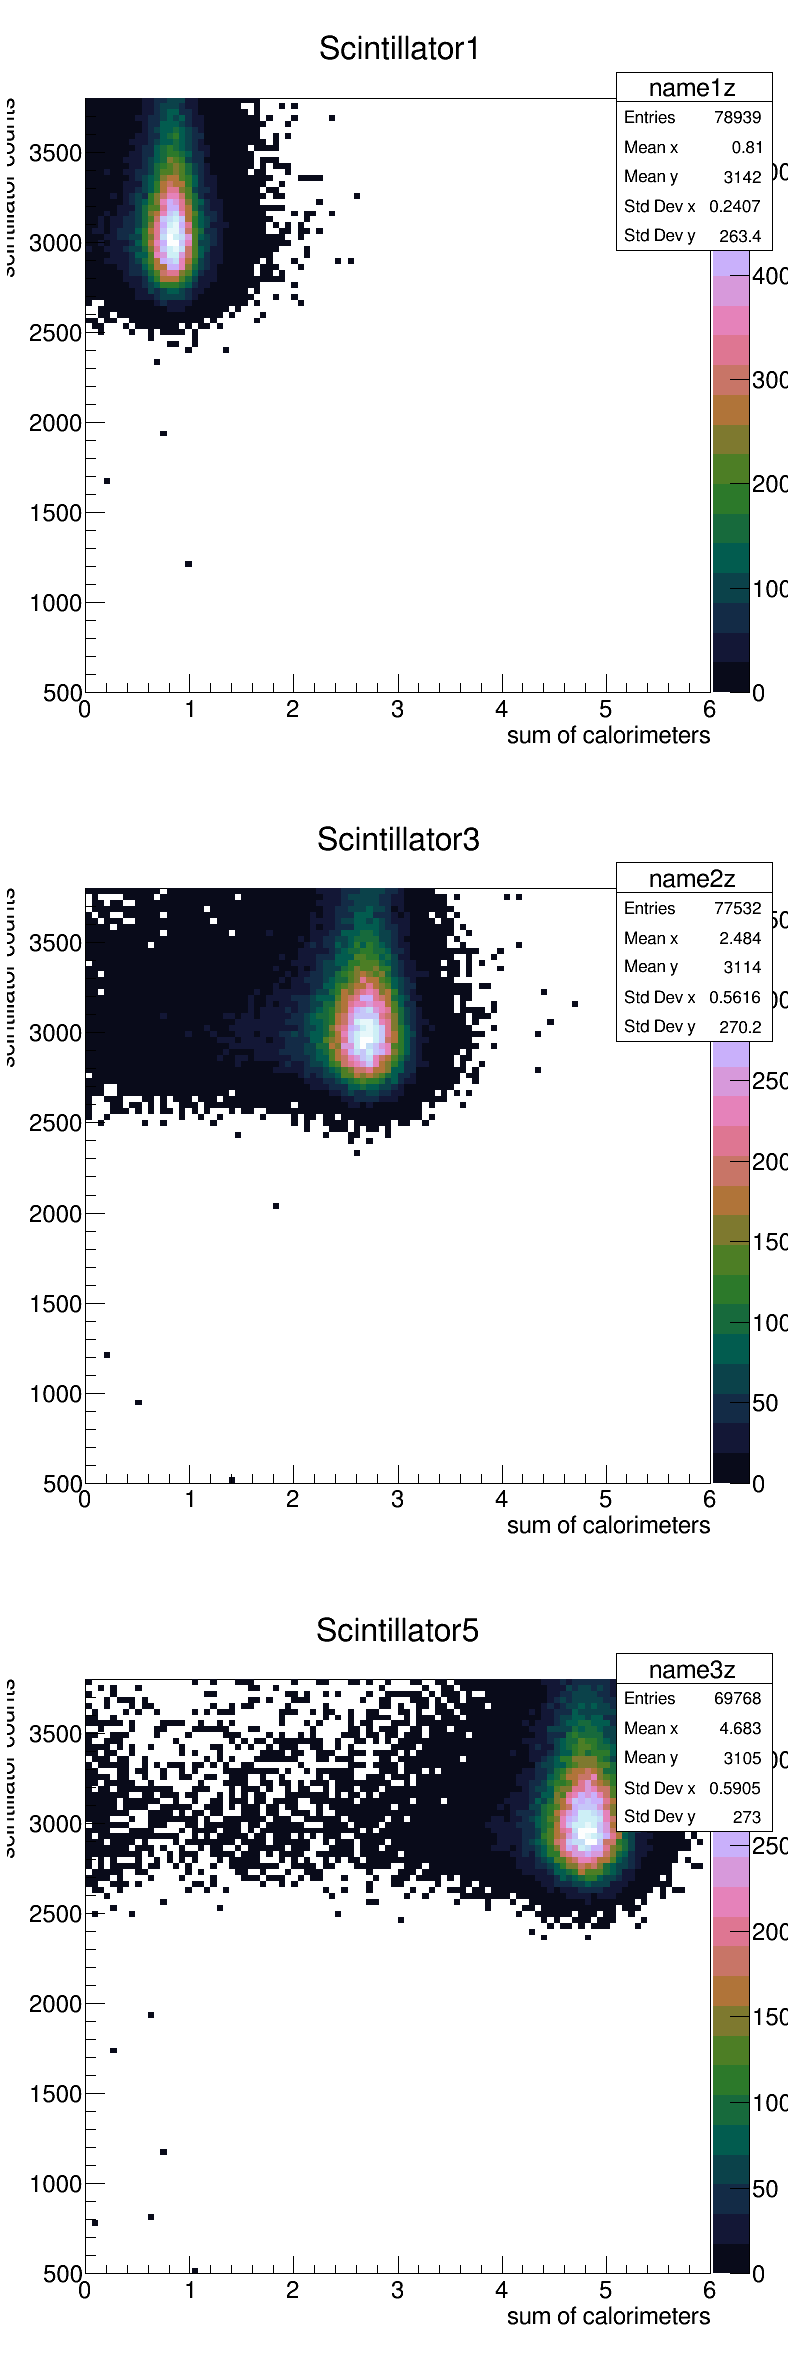

In [12]:
#And now to graph them
from array import array
x, y = array( 'f' ), array( 'f' )

runNumbers=[1571931443,  #1 GeV
           1571932668, #3 GeV
           1571935652] #5 GeV - 1 cm scintillator
runNumbers1=[1572006850,  #1 GeV
           1572004934, #3 GeV
           1572004238] #5 GeV  - 0.5 cm scintillator
cz=TCanvas("2zplots", "2zplots", 800, 2400)
cz.Divide(1, 3)
pedestal=230

'''dataFiles=[] #Not totally sure whz this refuses to work
for runNum in runNumbers:
    importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNum) + ".root", "READ")
    rootData=importFile.Get("RAWdata")
    dataFiles.append(rootData)'''
    
runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumbers[0]) + ".root" #1 GeV
importFile = TFile(runName, "READ")
RAWdata1=importFile.Get("RAWdata")

runName2="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumbers[1]) + ".root" #3 GeV
importFile2 = TFile(runName2, "READ")
RAWdata2=importFile2.Get("RAWdata")

runName3="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumbers[2]) + ".root" #5 GeV
importFile3 = TFile(runName3, "READ")
RAWdata3=importFile3.Get("RAWdata")

dataFiles=[RAWdata1, RAWdata2, RAWdata3] 


hist1r=TH2D("name1z", "Scintillator1; sum of calorimeters;scintillator counts", 100, 0, 6, 100, 500, 3800)
hist3r=TH2D("name2z", "Scintillator3; sum of calorimeters;scintillator counts", 100, 0, 6, 100, 500, 3800)
hist5r=TH2D("name3z", "Scintillator5; sum of calorimeters;scintillator counts", 100, 0, 6, 100, 500, 3800)

histogramList=[hist1r, hist3r, hist5r]

for RAWdata, hist1z in zip( dataFiles, histogramList):
    for event in RAWdata:
        caloDatA=[q if q>pedestal else 0 for q in [getattr(event, "QDC0_ch"+str(i)) for i in range(1, 6)]] #take the calorimeter values and store them to a list if they are above the pedestal
        for i in range(1, 6):
            if caloDatA[i-1]!=0:
                caloDatA[i-1]=caloDatA[i-1]*caloBration[i][0]+caloBration[i][1] #turn them into GeV
        partEnergy=sum(caloDatA)
        scintData=event.QDC0_ch0
        if scintData>300 and scintData<3800 and partEnergy>0: #above pedestal and below saturation
            hist1z.Fill(partEnergy, scintData)
            x.append(partEnergy)
            y.append(scintData)

gStyle.SetPalette(kCubehelix)
cz.cd(1)
hist1r.Draw("colz")
cz.cd(2)
hist3r.Draw("colz")                           
cz.cd(3)
hist5r.Draw("colz")

#histPlot=TGraph("name3z", "Scintillator5; sum of calorimeters;scintillator counts", 100, 0, 6, 100, 500, 3800)
cz.cd(4)

cz.Draw()

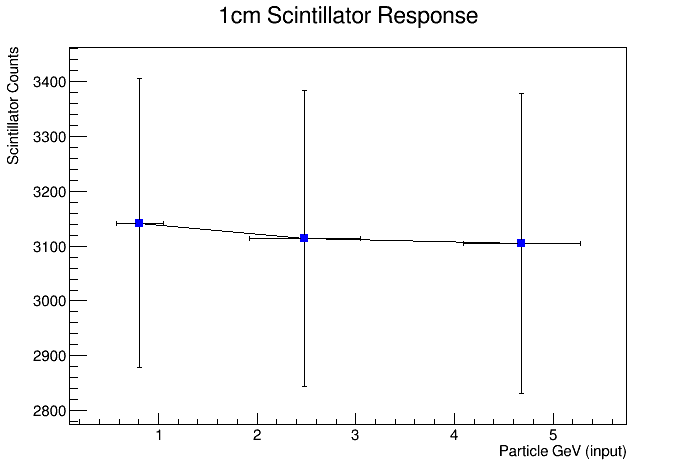

In [13]:
c1nvas = TCanvas( 'c1', 'A Simple Graph with error bars', 200, 10, 700, 500 )
y2  = array( 'f', [hist1r.GetMean(2), hist3r.GetMean(2), hist5r.GetMean(2)] )
x2  = array( 'f', [hist1r.GetMean(1), hist3r.GetMean(1), hist5r.GetMean(1)] )
ex  = array('f', [hist1r.GetStdDev(1), hist3r.GetStdDev(1), hist5r.GetStdDev(1)])
ey  = array('f', [hist1r.GetStdDev(2), hist3r.GetStdDev(2), hist5r.GetStdDev(2)])


gr = TGraphErrors(len(x2), x2, y2, ex, ey)
gr.SetTitle( '1cm Scintillator Response' )
gr.SetMarkerColor( 4 )
gr.SetMarkerStyle( 21 )
gr.Draw( 'ALP' )
gr.GetXaxis().SetTitle( 'Particle GeV (input)' )
gr.GetYaxis().SetTitle( 'Scintillator Counts' )
c1nvas.Draw()